In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import feature_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm

In [2]:
from platform import python_version
print(python_version())

3.8.3


In [3]:
print(np.__name__, np.__version__)
print(pd.__name__, pd.__version__)
print(sklearn.__name__, sklearn.__version__)

numpy 1.18.5
pandas 1.0.5
sklearn 0.23.1


Numeric Variable Definitions:
- Life expectancy = Average life expectancy in years 
- Infant deaths = Number of Infant Deaths per 1000 population
- Alcohol = Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)	
- percentage expenditure = Expenditure on health as a percentage of Gross Domestic Product per capita(%)	
- HepatitisB = Hepatitis B (HepB) immunization coverage among 1-year-olds (%)	
- Measles = Number of reported cases 
- BMI = Prevalence of overweight among adults, BMI ≥ 25, crude
- under-five deaths = Number of under-five deaths per 1000 population	
- Total expenditure = General government expenditure on health as a percentage of total government expenditure (%)
- HIV/AIDS = Deaths per 1000 live births HIV/AIDS (0-4 years)	 
- GDP = Gross Domestic Product in USD	 
- Population = Population of the country
- thinness1-19years = Prevalence of thinness among children and adolescents for Age 10 to 19 (% )	
- thinness5-9years = Prevalence of thinness among children for Age 5 to 9(%)	
- Income composition of resources = Relative share of each income source or group of sources, expressed as a percentage of the aggregate total income of that group or area.
- Schooling = Number of years of Schooling
- Adult Mortality = Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- Polio = Polio (Pol3) immunization coverage among 1-year-olds (%)
- Diphtheria = Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)


In [4]:
df = pd.read_csv('DataWithoutNaNIndex.csv')
df = df.drop(columns=['Unnamed: 0'],axis=1)

In [5]:
df.head()

,Status,Life expectancy,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Adult Mortality,Polio,Diphtheria
0,Developing,65.0,62,0.01,71.279624,65,1154,19.1,83,8.16,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,233.2,69,65
1,Developing,59.9,64,0.01,73.523582,62,492,18.6,86,8.18,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,234.3,62,62
2,Developing,59.9,66,0.01,73.219243,64,430,18.1,89,8.13,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,235.5,64,64
3,Developing,59.5,69,0.01,78.184215,67,2787,17.6,93,8.52,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,242.3,67,67
4,Developing,59.2,71,0.01,7.097109,68,3013,17.2,97,7.87,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,248.2,68,68


In [6]:
df.shape

(1634, 20)

In [7]:
df['Status'].value_counts()

Developing    1392
Developed      242
Name: Status, dtype: int64

In [8]:
df.describe()

,Life expectancy,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Adult Mortality,Polio,Diphtheria
count,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1.634000e+03,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000
mean,69.471971,32.827417,4.533837,702.666953,79.206242,2244.433905,38.248715,44.591799,5.943507,1.683843,5597.847034,1.478375e+07,4.834211,4.890392,0.632630,12.136781,194.278072,87.886169,87.974296
std,8.645932,121.366831,4.041583,1766.671934,25.578063,10129.853889,19.787508,163.598003,2.301551,4.947487,11522.929508,7.077009e+07,4.614473,4.668795,0.183573,2.801415,108.080422,12.720916,12.698996
min,44.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,0.740000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000,53.080000,23.000000,19.000000
25%,64.600000,1.000000,0.810000,37.139483,74.000000,0.000000,19.500000,1.000000,4.392500,0.100000,462.241716,2.031178e+05,1.600000,1.600000,0.511250,10.400000,120.300000,83.000000,83.000000
50%,71.800000,3.000000,3.755000,145.210267,89.000000,15.000000,43.950000,4.000000,5.830000,0.100000,1588.040565,1.440206e+06,3.000000,3.100000,0.675000,12.300000,169.500000,93.000000,93.000000
75%,75.000000,22.750000,7.380000,509.293006,96.000000,376.000000,55.800000,30.000000,7.457500,0.675000,4773.284308,7.805794e+06,7.000000,7.100000,0.752000,14.000000,244.800000,97.000000,97.000000
max,89.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,14.390000,43.500000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000,696.900000,99.000000,99.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           1634 non-null   object 
 1   Life expectancy                  1634 non-null   float64
 2   infant deaths                    1634 non-null   int64  
 3   Alcohol                          1634 non-null   float64
 4   percentage expenditure           1634 non-null   float64
 5   Hepatitis B                      1634 non-null   int64  
 6   Measles                          1634 non-null   int64  
 7    BMI                             1634 non-null   float64
 8   under-five deaths                1634 non-null   int64  
 9   Total expenditure                1634 non-null   float64
 10   HIV/AIDS                        1634 non-null   float64
 11  GDP                              1634 non-null   float64
 12  Population          

In [10]:
#cols = ['Life expectancy ','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles ',' BMI ',
#        'under-five deaths ','Total expenditure',' HIV/AIDS','GDP','Population',' thinness  1-19 years',' thinness 5-9 years',
#        'Income composition of resources','Schooling','Adult Mortality','Polio','Diphtheria']


In [11]:
# Change Developed/Developing to Dummy Variables 

df3 = pd.get_dummies(df, prefix=None)
df3.head()

,Life expectancy,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,...,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Adult Mortality,Polio,Diphtheria,Status_Developed,Status_Developing
0,65.0,62,0.01,71.279624,65,1154,19.1,83,8.16,0.1,...,33736494.0,17.2,17.3,0.479,10.1,233.2,69,65,0,1
1,59.9,64,0.01,73.523582,62,492,18.6,86,8.18,0.1,...,327582.0,17.5,17.5,0.476,10.0,234.3,62,62,0,1
2,59.9,66,0.01,73.219243,64,430,18.1,89,8.13,0.1,...,31731688.0,17.7,17.7,0.470,9.9,235.5,64,64,0,1
3,59.5,69,0.01,78.184215,67,2787,17.6,93,8.52,0.1,...,3696958.0,17.9,18.0,0.463,9.8,242.3,67,67,0,1
4,59.2,71,0.01,7.097109,68,3013,17.2,97,7.87,0.1,...,2978599.0,18.2,18.2,0.454,9.5,248.2,68,68,0,1


# Predicting Vaccination & Disease Rates

In [12]:
print('Correlations with Polio Vaccination Rate:\n')
df3[df3.columns[0:]].corr()['Polio'][:].to_frame().sort_values(by=['Polio'], ascending=False).round(2)

Correlations with Polio Vaccination Rate:



,Polio
Polio,1.00
Diphtheria,0.97
Life expectancy,0.52
Schooling,0.50
Hepatitis B,0.46
Income composition of resources,0.45
BMI,0.30
Alcohol,0.29
Status_Developed,0.23
GDP,0.20


In [13]:
print('Correlations with Diphtheria Vaccination Rate:\n')
df3[df3.columns[0:]].corr()['Diphtheria'][:].to_frame().sort_values(by=['Diphtheria'], ascending=False).round(2)

Correlations with Diphtheria Vaccination Rate:



,Diphtheria
Diphtheria,1.00
Polio,0.97
Life expectancy,0.51
Schooling,0.50
Hepatitis B,0.48
Income composition of resources,0.44
BMI,0.30
Alcohol,0.29
Status_Developed,0.23
GDP,0.20


In [14]:
print('Correlations with Hepatitis B Vaccination Rate:\n')
df3[df3.columns[0:]].corr()['Hepatitis B'][:].to_frame().sort_values(by=['Hepatitis B'], ascending=False).round(2)

Correlations with Hepatitis B Vaccination Rate:



,Hepatitis B
Hepatitis B,1.00
Diphtheria,0.48
Polio,0.46
Schooling,0.22
Life expectancy,0.21
Income composition of resources,0.19
BMI,0.15
Status_Developed,0.14
Total expenditure,0.11
Alcohol,0.11


# Functions 

In [15]:
def distributions(varname, longname, data):
    '''histogram of target variable'''
    
    fig = plt.figure(figsize = (10,4))
    title = fig.suptitle(longname, fontsize=14)
    fig.subplots_adjust(top=0.85, wspace=0.3)

    ax1 = fig.add_subplot(1,2, 1)
    ax1.set_title("Developed Countries")
    freq1, bins1, patches1 = ax1.hist(df.loc[df['Status']=='Developed'][varname], bins=15, edgecolor='white', linewidth=1)

    ax2 = fig.add_subplot(1,2, 2)
    ax2.set_title("Developing Countries")
    freq2, bins2, patches2 = ax2.hist(df.loc[df['Status']=='Developing'][varname], bins=15, edgecolor='white', linewidth=1)

In [16]:
def dataTransform(X_train, X_test, n, k, transformation):
    '''Transform the data via Standard Scalar, PCA, or KPCA'''
            
    if transformation == 'KPCA':
        kpca = KernelPCA(n_components=k, kernel='rbf', n_jobs=-1, remove_zero_eig=True, random_state=1)
        kpca.fit(X_train)
        X_train = kpca.transform(X_train)
        X_test = kpca.transform(X_test)
               
    elif transformation != 'KPCA':
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)        

        if transformation == 'PCA':
            pca = PCA(n_components=n)
            pca.fit(X_train)
            X_train = pca.transform(X_train)
            X_test = pca.transform(X_test)
                  
    return X_train, X_test 

In [17]:
def findPCA(data, varname, model, variables):
    '''Find optimal number of compoenents for PCA''' 

    y = data[varname]
    X = data.drop([varname], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)
    
    # Scale the data using StandardScaler
    X_train, X_test = dataTransform(X_train, X_test, variables, variables, 'SS')

    scores_pca = []
    mdl = model

    for i in range(1, variables):
        pca = PCA(n_components=i, random_state=0)
        X_train2 = pca.fit_transform(X_train)
        X_test2 = pca.transform(X_test)

        score = mdl.fit(X_train2, y_train).score(X_test2, y_test)
        scores_pca.append(score)

    print(pca.explained_variance_ratio_.cumsum())
    plt.plot(pca.explained_variance_ratio_.cumsum(), '-o');
    plt.xticks(ticks= range(X_train.shape[1]), labels=[i+1 for i in range(X_train.shape[1])])
    plt.xlabel('Principal Components')
    plt.ylabel('Variance Explained')
    plt.show()
    

In [18]:
def runModel2(X_train, X_test, y_train, y_test, model): 
    '''run model and return accuracy'''

    mdl = model
    mdl.fit(X_train, y_train)

    pred_train = mdl.predict(X_train)
    pred_test = mdl.predict(X_test)
    R2_train = metrics.r2_score(y_train, pred_train)
    R2_test= metrics.r2_score(y_test, pred_test) 
    R2_diff = metrics.r2_score(y_train, pred_train) - metrics.r2_score(y_test, pred_test) 
    RMSE_train = metrics.mean_squared_error(y_train, pred_train) 
    RMSE_test = metrics.mean_squared_error(y_test, pred_test)
    
    return R2_train, R2_test, R2_diff, RMSE_train, RMSE_test

In [19]:
def runModels(modellist, transformations, n, k, varname, data):
    '''Run multiple models, return accuracy'''
    
    # Split data in train-test sets
    y = data[varname]
    X = data.drop([varname], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)
      
    mdlacc = pd.DataFrame(columns = ['Model', 'Transformation', 'R2 Train', 'R2 Test', 
                                     'R2 Diff', 'RMSE Train', 'RMSE Test'])

    for t in transformations:
        
        # Transform the data, 'none' should pass through dataTransform function with no changes
        X_train2, X_test2 = dataTransform(X_train, X_test, n, k, t)        

        for m in modellist:        
            # Run model on transformed data and return accuracy and error 
            
            if str(m) in ['DecisionTreeRegressor()', 'RandomForestRegressor()', 
                          'AdaBoostRegressor()', 'GradientBoostingRegressor()']:
                if t != 'SS':
                    # Skip using Standard Scaler on tree-based models 
                    R2_train, R2_test, R2_diff, RMSE_train, RMSE_test = runModel2(X_train2, X_test2, y_train, y_test, m)
                    mdlacc = mdlacc.append({'Model' : str(m), 'Transformation' : t, 
                                    'R2 Train' : R2_train, 'R2 Test' : R2_test, 'R2 Diff' : R2_diff, 
                                    'RMSE Train' : RMSE_train, 'RMSE Test' : RMSE_test}, ignore_index = True)

            else:             
                R2_train, R2_test, R2_diff, RMSE_train, RMSE_test = runModel2(X_train2, X_test2, y_train, y_test, m)
                mdlacc = mdlacc.append({'Model' : str(m), 'Transformation' : t, 
                                        'R2 Train' : R2_train, 'R2 Test' : R2_test, 'R2 Diff' : R2_diff, 
                                        'RMSE Train' : RMSE_train, 'RMSE Test' : RMSE_test}, ignore_index = True)

    return mdlacc.sort_values(by=['R2 Test'], ascending=False).round(2)

In [20]:
def best_param(params, model, X_train, y_train):
    '''find the best parameter value'''
    
    mdl = model()
    gs = GridSearchCV(estimator=mdl, param_grid=params, scoring='r2')

    gs.fit(X_train, y_train)
    best_estimator = gs.best_estimator_

    return best_estimator 
    

In [21]:
def tunedModel(varname, data, model, t, n, k):
    '''Tune best model and return top features'''
    
    y = data[varname]
    X = data.drop([varname], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)
    
    # Transform the data, 'none' should pass back original data
    X_train2, X_test2 = dataTransform(X_train, X_test, n, k, t)        

    
    #Find best parameters via grid search 
    if model == GradientBoostingRegressor:
        params = dict(learning_rate = [0.001, 0.01, 0.1, 0.3, 0.6, 1], n_estimators = [10, 50, 100])
    else: 
        params = dict(min_samples_split = [2, 5, 10, 25, 50], max_depth = [2, 5, 10, 25])
    mdl = best_param(params, model, X, y)
    print('\nBest Model: ', mdl)
    mdl.fit(X_train, y_train)

    pred_train = mdl.predict(X_train)
    pred_test = mdl.predict(X_test)
    print('\nR2 on Training:', metrics.r2_score(y_train, pred_train))
    print('R2 on Test:    ', metrics.r2_score(y_test, pred_test), '\n')
    print('Difference: ', metrics.r2_score(y_train, pred_train) - metrics.r2_score(y_test, pred_test), '\n')
    print('RMSE on Training:', metrics.mean_squared_error(y_train, pred_train))
    print('RMSE on Test:    ', metrics.mean_squared_error(y_test, pred_test))

    features = pd.DataFrame(columns = ['Feature', 'Importance'])
        
    for i in range(len(X.columns.values)):
        feature = X.columns.values[i]
        importance = mdl.feature_importances_[i].round(2)
        features = features.append({'Feature' : feature, 'Importance' : importance}, ignore_index = True)    
    
    print('\nFeature Importance:')
    feats = features.sort_values(by=['Importance'], ascending=True)
    ax = feats.plot.barh(x='Feature', y='Importance', rot=0)

    return features.sort_values(by=['Importance'], ascending=False)


In [22]:
def defaultSettings(varname, data, model, t, n, k):
    y = data[varname]
    X = data.drop([varname], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=55)

    # Transform the data, 'none' should pass back original data
    X_train2, X_test2 = dataTransform(X_train, X_test, n, k, t)        

    mdl = model()
    print('\nBest Model: ', mdl)
    mdl.fit(X_train, y_train)

    pred_train = mdl.predict(X_train)
    pred_test = mdl.predict(X_test)
    print('\nR2 on Training:', metrics.r2_score(y_train, pred_train))
    print('R2 on Test:    ', metrics.r2_score(y_test, pred_test), '\n')
    print('Difference: ', metrics.r2_score(y_train, pred_train) - metrics.r2_score(y_test, pred_test), '\n')
    print('RMSE on Training:', metrics.mean_squared_error(y_train, pred_train))
    print('RMSE on Test:    ', metrics.mean_squared_error(y_test, pred_test))

    features = pd.DataFrame(columns = ['Feature', 'Importance'])

    for i in range(len(X.columns.values)):
        feature = X.columns.values[i]
        importance = mdl.feature_importances_[i]
        features = features.append({'Feature' : feature, 'Importance' : importance}, ignore_index = True)    

    print('\nFeature Importance:')
    feats = features.sort_values(by=['Importance'], ascending=True).round(2)
    ax = feats.plot.barh(x='Feature', y='Importance', rot=0)

    return features.sort_values(by=['Importance'], ascending=False)


# Predicting Polio Vaccination Rates

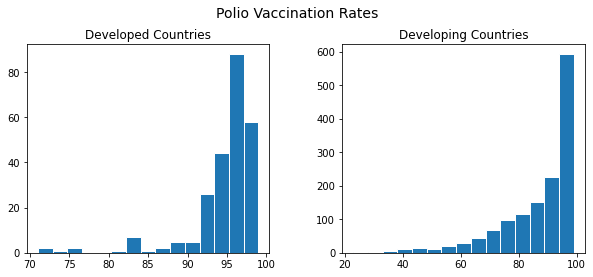

In [23]:
varname = 'Polio'
longname = 'Polio Vaccination Rates'
distributions(varname, longname, df)

In [24]:
# Remove highly correlated variable 
dfp = df3.drop(columns=['Diphtheria'],axis=1)

In [25]:
# Split Developing and Developed Countries 
dfp1 = dfp.loc[dfp['Status_Developing']==1]
dfp0 = dfp.loc[dfp['Status_Developing']==0]
dfp1 = dfp1.drop(columns=['Status_Developing', 'Status_Developed'],axis=1)
dfp0 = dfp0.drop(columns=['Status_Developing', 'Status_Developed'],axis=1)
print(dfp1.shape)
print(dfp0.shape)

(1392, 18)
(242, 18)


In [26]:
print('Correlations with Polio Vaccination Rate in Developing Countries:\n')
dfp1[dfp1.columns[0:]].corr()['Polio'][:].to_frame().sort_values(by=['Polio'], ascending=False).round(2)

Correlations with Polio Vaccination Rate in Developing Countries:



,Polio
Polio,1.00
Life expectancy,0.49
Schooling,0.49
Hepatitis B,0.47
Income composition of resources,0.40
BMI,0.27
GDP,0.21
Alcohol,0.20
percentage expenditure,0.17
Total expenditure,0.13


In [27]:
print('Correlations with Polio Vaccination Rate in Developed Countries:\n')
dfp0[dfp0.columns[0:]].corr()['Polio'][:].to_frame().sort_values(by=['Polio'], ascending=False).round(2)

Correlations with Polio Vaccination Rate in Developed Countries:



,Polio
Polio,1.00
under-five deaths,0.19
infant deaths,0.16
Total expenditure,0.15
Hepatitis B,0.13
Population,0.11
Adult Mortality,0.05
Measles,0.01
HIV/AIDS,0.00
BMI,-0.00


PCA for Developing Countires Polio Vaccination Rates 

[0.32185405 0.4983127  0.60546206 0.68203422 0.74521874 0.7982233
 0.84359881 0.88391644 0.9185092  0.94345821 0.96277043 0.97764236
 0.98821218 0.99297704 0.99742291 0.99987524 1.        ]


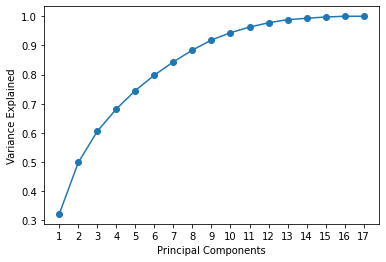

Wall time: 15.9 s


In [28]:
%%time 

# Find ideal number of Principle Components 
n = dfp1.shape[1]
print('PCA for Developing Countires', longname, '\n')
findPCA(dfp1, varname, RandomForestRegressor(), n)

In [29]:
%%time 

modellist = [DecisionTreeRegressor(), LinearRegression(), Lasso(), Ridge(), SVR(kernel='rbf'), RandomForestRegressor(), 
             AdaBoostRegressor(), GradientBoostingRegressor()]
transformations = ['none', 'SS', 'PCA', 'KPCA']

# Check model performance for each combination of model + data transformation 
pca = 13
k= 500
mdlacc = runModels(modellist, transformations, pca, k, varname, dfp1)

print('Model Performance for Developing Countries for', longname)
mdlacc.head(n=10)

Model Performance for Developing Countries for Polio Vaccination Rates
Wall time: 1min 32s


,Model,Transformation,R2 Train,R2 Test,R2 Diff,RMSE Train,RMSE Test
5,RandomForestRegressor(),none,0.97,0.76,0.21,4.65,39.07
7,GradientBoostingRegressor(),none,0.91,0.72,0.19,16.21,45.80
17,RandomForestRegressor(),PCA,0.96,0.60,0.36,7.51,65.31
19,GradientBoostingRegressor(),PCA,0.86,0.58,0.28,24.96,68.58
0,DecisionTreeRegressor(),none,1.00,0.52,0.48,0.00,78.52
6,AdaBoostRegressor(),none,0.67,0.50,0.17,59.73,82.53
16,SVR(),PCA,0.49,0.47,0.03,91.53,87.41
4,SVR(),none,0.49,0.46,0.03,92.72,88.07
11,SVR(),SS,0.49,0.46,0.03,92.72,88.07
18,AdaBoostRegressor(),PCA,0.59,0.41,0.18,74.59,96.33


In [30]:
# Keep track of best models in a dataframe

bestmodels_Polio = pd.DataFrame(columns = ['Variable', 'Country Status', 'Best Default Model', 'Best Data Transform', 
                                     'R2 Train','R2 Test','R2 Diff','RMSE Train','RMSE Test'])

bestmodels_Polio = bestmodels_Polio.append({'Variable' : varname, 'Country Status' : 'Developing', 
                                            'Best Default Model' : 'RandomForest','Best Data Transform' : 'none',
                                            'R2 Train': 0.97, 'R2 Test' : 0.76, 'R2 Diff' : 0.22,
                                            'RMSE Train' : 4.67, 'RMSE Test': 39.61}, ignore_index = True)

PCA for Developed Countires Polio Vaccination Rates 

[0.31729782 0.4786058  0.5743092  0.64845884 0.7146575  0.77338352
 0.82898454 0.88045309 0.92795036 0.95873195 0.97892679 0.98944215
 0.99424632 0.99732115 0.99978978 1.         1.        ]


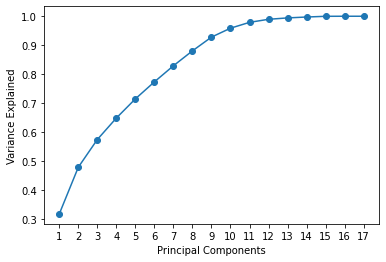

In [31]:
# Find ideal number of Principle Components 
n = dfp0.shape[1]
print('PCA for Developed Countires', longname, '\n')
findPCA(dfp0, varname, RandomForestRegressor(), n)

In [32]:
%%time 

# Check model performance for each combination of model + data transformation 
pca = 12
k=100
mdlacc = runModels(modellist, transformations, pca, k, varname, dfp0)

print('Model Performance for Developed Countries', longname)
mdlacc.head(n=10)

Model Performance for Developed Countries Polio Vaccination Rates
Wall time: 3.98 s


,Model,Transformation,R2 Train,R2 Test,R2 Diff,RMSE Train,RMSE Test
7,GradientBoostingRegressor(),none,0.99,0.53,0.45,0.24,16.68
5,RandomForestRegressor(),none,0.93,0.42,0.51,1.18,20.82
0,DecisionTreeRegressor(),none,1.00,0.41,0.59,0.00,21.18
18,AdaBoostRegressor(),PCA,0.82,0.28,0.54,3.03,25.80
19,GradientBoostingRegressor(),PCA,0.97,0.26,0.71,0.42,26.24
6,AdaBoostRegressor(),none,0.85,0.24,0.61,2.49,27.25
17,RandomForestRegressor(),PCA,0.91,0.16,0.75,1.46,29.88
1,LinearRegression(),none,0.39,0.13,0.25,10.14,30.84
8,LinearRegression(),SS,0.39,0.13,0.25,10.14,30.84
3,Ridge(),none,0.37,0.13,0.24,10.32,30.96


In [33]:
bestmodels_Polio = bestmodels_Polio.append({'Variable' : varname, 'Country Status' : 'Developed', 
                                            'Best Default Model' : 'GradientBoost','Best Data Transform' : 'none', 
                                            'R2 Train': 0.99, 'R2 Test' : 0.53, 'R2 Diff' : 0.46,
                                            'RMSE Train' : 0.24, 'RMSE Test': 16.89}, ignore_index = True)

In [34]:
bestmodels_Polio

,Variable,Country Status,Best Default Model,Best Data Transform,R2 Train,R2 Test,R2 Diff,RMSE Train,RMSE Test
0,Polio,Developing,RandomForest,none,0.97,0.76,0.22,4.67,39.61
1,Polio,Developed,GradientBoost,none,0.99,0.53,0.46,0.24,16.89


Best model performance for: Polio Vaccination Rates in Developing Countries

Best Model:  RandomForestRegressor(max_depth=10)

R2 on Training: 0.9650644596375008
R2 on Test:     0.7647212867425475 

Difference:  0.2003431728949533 

RMSE on Training: 6.304827388956309
RMSE on Test:     38.45955245978763

Feature Importance:
Wall time: 1min 16s


,Feature,Importance
4,Hepatitis B,0.56
0,Life expectancy,0.11
14,Income composition of resources,0.05
15,Schooling,0.04
1,infant deaths,0.03
8,Total expenditure,0.03
2,Alcohol,0.03
16,Adult Mortality,0.03
6,BMI,0.02
7,under-five deaths,0.02


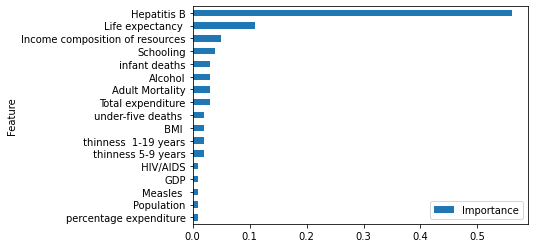

In [35]:
%%time 

# Tune the model 
print('Best model performance for:', longname, 'in Developing Countries')
features = tunedModel(varname, dfp1, RandomForestRegressor, 'none', 0, 0)
features.head(n=10)

Best model performance for: Polio Vaccination Rates  in Developed Countries

Best Model:  GradientBoostingRegressor(learning_rate=0.001)

R2 on Training: 0.09508911376259244
R2 on Test:     0.003859532908640495 

Difference:  0.09122958085395194 

RMSE on Training: 14.92808792365944
RMSE on Test:     35.49590347019015

Feature Importance:
Wall time: 6.39 s


,Feature,Importance
6,BMI,0.27
13,thinness 5-9 years,0.19
4,Hepatitis B,0.18
12,thinness 1-19 years,0.13
15,Schooling,0.06
0,Life expectancy,0.03
11,Population,0.02
14,Income composition of resources,0.02
16,Adult Mortality,0.02
5,Measles,0.02


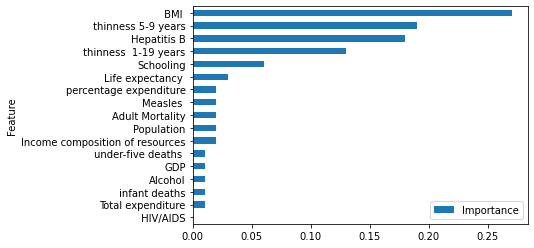

In [36]:
%%time 

#Tune the model 
print('Best model performance for:', longname, ' in Developed Countries')
features = tunedModel(varname, dfp0, GradientBoostingRegressor, 'none', 0, 0)
features.head(n=10)

Best model performance for: Polio Vaccination Rates  in Developed Countries

Best Model:  GradientBoostingRegressor()

R2 on Training: 0.9855578089815132
R2 on Test:     0.5241751794669653 

Difference:  0.4613826295145479 

RMSE on Training: 0.23824920289188867
RMSE on Test:     16.95527132601885

Feature Importance:
Wall time: 346 ms


,Feature,Importance
13,thinness 5-9 years,0.184826
4,Hepatitis B,0.168202
12,thinness 1-19 years,0.157442
6,BMI,0.149112
0,Life expectancy,0.070366
15,Schooling,0.060184
11,Population,0.058088
2,Alcohol,0.026052
8,Total expenditure,0.022683
16,Adult Mortality,0.022288


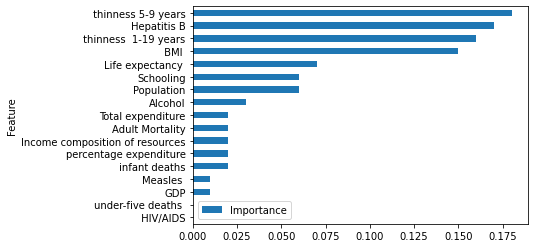

In [37]:
%%time 

#Default settings were better 
print('Best model performance for:', longname, ' in Developed Countries')
features = defaultSettings(varname, dfp0, GradientBoostingRegressor, 'none', 0, 0)
features.head(n=10)

# Predicting Diphtheria Vaccination Rates

In [38]:
varname = 'Diphtheria'
longname = 'Diphtheria Vaccination Rates'

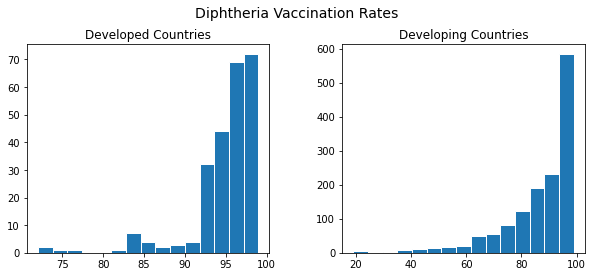

In [39]:
distributions(varname, longname, df)

In [40]:
# Remove highly correlated variable 
dfd = df3.drop(columns=['Polio'],axis=1)

In [41]:
# Split Developing and Developed Countries 
dfd1 = dfd.loc[dfp['Status_Developing']==1]
dfd0 = dfd.loc[dfp['Status_Developing']==0]
dfd1 = dfd1.drop(columns=['Status_Developing', 'Status_Developed'],axis=1)
dfd0 = dfd0.drop(columns=['Status_Developing', 'Status_Developed'],axis=1)
print(dfd1.shape)
print(dfd0.shape)

(1392, 18)
(242, 18)


In [42]:
print('Correlations with Diphtheria Vaccination Rate in Developing Countries:\n')
dfd1[dfd1.columns[0:]].corr()['Diphtheria'][:].to_frame().sort_values(by=['Diphtheria'], ascending=False).round(2)

Correlations with Diphtheria Vaccination Rate in Developing Countries:



,Diphtheria
Diphtheria,1.00
Hepatitis B,0.49
Life expectancy,0.49
Schooling,0.49
Income composition of resources,0.40
BMI,0.27
Alcohol,0.21
GDP,0.20
percentage expenditure,0.17
Total expenditure,0.15


In [43]:
print('Correlations with Diphtheria Vaccination Rate in Developed Countries:\n')
dfd0[dfd0.columns[0:]].corr()['Diphtheria'][:].to_frame().sort_values(by=['Diphtheria'], ascending=False).round(2)

Correlations with Diphtheria Vaccination Rate in Developed Countries:



,Diphtheria
Diphtheria,1.00
under-five deaths,0.16
infant deaths,0.14
Hepatitis B,0.12
Total expenditure,0.12
Population,0.08
Adult Mortality,0.07
Alcohol,0.02
thinness 1-19 years,0.00
HIV/AIDS,-0.00


PCA for Developing Countires Diphtheria Vaccination Rates 

[0.32185405 0.4983127  0.60546206 0.68203422 0.74521874 0.7982233
 0.84359881 0.88391644 0.9185092  0.94345821 0.96277043 0.97764236
 0.98821218 0.99297704 0.99742291 0.99987524 1.        ]


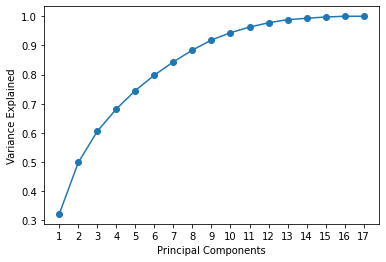

In [44]:
# Find ideal number of Principle Components 
n = dfd1.shape[1]
print('PCA for Developing Countires', longname, '\n')
findPCA(dfd1, varname, RandomForestRegressor(), n)

In [45]:
%%time 

# Check model performance for each combination of model + data transformation 
pca = 13
k=500
mdlacc = runModels(modellist, transformations, pca, k, varname, dfd1)

print('Model Performance for Developing Countries for', longname)
mdlacc.head(n=10)

Model Performance for Developing Countries for Diphtheria Vaccination Rates
Wall time: 1min 45s


,Model,Transformation,R2 Train,R2 Test,R2 Diff,RMSE Train,RMSE Test
5,RandomForestRegressor(),none,0.98,0.80,0.17,4.32,32.80
7,GradientBoostingRegressor(),none,0.93,0.78,0.15,12.57,36.51
6,AdaBoostRegressor(),none,0.79,0.66,0.14,36.62,57.37
17,RandomForestRegressor(),PCA,0.96,0.64,0.32,7.21,60.34
0,DecisionTreeRegressor(),none,1.00,0.61,0.39,0.00,65.54
19,GradientBoostingRegressor(),PCA,0.88,0.57,0.31,21.47,72.19
16,SVR(),PCA,0.49,0.48,0.01,90.54,87.20
4,SVR(),none,0.48,0.47,0.01,91.83,88.08
11,SVR(),SS,0.48,0.47,0.01,91.83,88.08
8,LinearRegression(),SS,0.50,0.42,0.08,88.41,97.04


In [46]:
# Keep track of best models in a dataframe

bestmodels_Dip = pd.DataFrame(columns = ['Variable', 'Country Status', 'Best Default Model', 'Best Data Transform', 
                                     'R2 Train','R2 Test','R2 Diff','RMSE Train','RMSE Test'])

bestmodels_Dip = bestmodels_Dip.append({'Variable' : varname, 'Country Status' : 'Developing', 
                                            'Best Default Model' : 'RandomForest','Best Data Transform' : 'none',
                                            'R2 Train': 0.97, 'R2 Test' : 0.81, 'R2 Diff' : 0.16,
                                            'RMSE Train' : 4.7, 'RMSE Test': 31.8}, ignore_index = True)

PCA for Developed Countires Diphtheria Vaccination Rates 

[0.31729782 0.4786058  0.5743092  0.64845884 0.7146575  0.77338352
 0.82898454 0.88045309 0.92795036 0.95873195 0.97892679 0.98944215
 0.99424632 0.99732115 0.99978978 1.         1.        ]


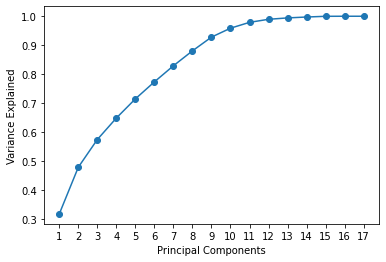

In [47]:
# Find ideal number of Principle Components 
n = dfd0.shape[1]
print('PCA for Developed Countires', longname, '\n')
findPCA(dfd0, varname, RandomForestRegressor(), n)

In [48]:
%%time 

# Check model performance for each combination of model + data transformation 
pca = 12
k=100
mdlacc = runModels(modellist, transformations, pca, k, varname, dfd0)

print('Model Performance for Developed Countries', longname)
mdlacc.head(n=10)

Model Performance for Developed Countries Diphtheria Vaccination Rates
Wall time: 3.62 s


,Model,Transformation,R2 Train,R2 Test,R2 Diff,RMSE Train,RMSE Test
0,DecisionTreeRegressor(),none,1.00,0.89,0.11,0.00,4.11
5,RandomForestRegressor(),none,0.95,0.49,0.46,0.79,18.82
7,GradientBoostingRegressor(),none,0.98,0.46,0.53,0.26,20.03
19,GradientBoostingRegressor(),PCA,0.98,0.30,0.67,0.34,25.71
6,AdaBoostRegressor(),none,0.84,0.24,0.60,2.37,27.94
18,AdaBoostRegressor(),PCA,0.82,0.19,0.62,2.73,29.78
17,RandomForestRegressor(),PCA,0.91,0.15,0.76,1.32,31.43
8,LinearRegression(),SS,0.37,0.12,0.25,9.44,32.63
1,LinearRegression(),none,0.37,0.12,0.25,9.44,32.63
3,Ridge(),none,0.36,0.11,0.25,9.58,32.99


In [49]:
bestmodels_Dip = bestmodels_Dip.append({'Variable' : varname, 'Country Status' : 'Developed', 
                                            'Best Default Model' : 'DecisoinTree','Best Data Transform' : 'none', 
                                            'R2 Train': 1.00, 'R2 Test' : 0.92, 'R2 Diff' : 0.08,
                                            'RMSE Train' : 0.00, 'RMSE Test': 2.87}, ignore_index = True)

In [50]:
bestmodels_Dip

,Variable,Country Status,Best Default Model,Best Data Transform,R2 Train,R2 Test,R2 Diff,RMSE Train,RMSE Test
0,Diphtheria,Developing,RandomForest,none,0.97,0.81,0.16,4.7,31.80
1,Diphtheria,Developed,DecisoinTree,none,1.00,0.92,0.08,0.0,2.87


Best model performance for: Diphtheria Vaccination Rates in Developing Countries

Best Model:  RandomForestRegressor(max_depth=10, min_samples_split=5)

R2 on Training: 0.9566594873402887
R2 on Test:     0.7976802970999368 

Difference:  0.1589791902403519 

RMSE on Training: 7.726761783744466
RMSE on Test:     33.91791820095809

Feature Importance:
Wall time: 1min 17s


,Feature,Importance
4,Hepatitis B,0.59
0,Life expectancy,0.11
15,Schooling,0.05
14,Income composition of resources,0.04
1,infant deaths,0.03
16,Adult Mortality,0.03
2,Alcohol,0.03
7,under-five deaths,0.02
8,Total expenditure,0.02
6,BMI,0.01


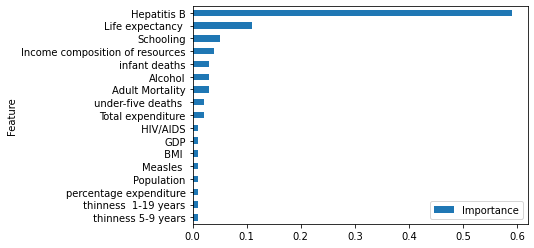

In [51]:
%%time 

# Tune the model 
print('Best model performance for:', longname, 'in Developing Countries')
features = tunedModel(varname, dfd1, RandomForestRegressor, 'none', 0, 0)
features.head(n=10)

Best model performance for: Diphtheria Vaccination Rates  in Developed Countries

Best Model:  DecisionTreeRegressor(max_depth=5, min_samples_split=5)

R2 on Training: 0.925074967094961
R2 on Test:     0.8809319939539424 

Difference:  0.04414297314101856 

RMSE on Training: 1.1143637811171123
RMSE on Test:     4.393388630505672

Feature Importance:
Wall time: 1.1 s


,Feature,Importance
13,thinness 5-9 years,0.38
4,Hepatitis B,0.25
8,Total expenditure,0.13
6,BMI,0.07
15,Schooling,0.06
16,Adult Mortality,0.05
12,thinness 1-19 years,0.04
5,Measles,0.01
7,under-five deaths,0.01
0,Life expectancy,0.01


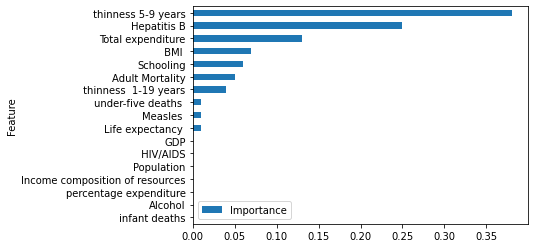

In [52]:
%%time 

#Tune the model 
print('Best model performance for:', longname, ' in Developed Countries')
features = tunedModel(varname, dfd0, DecisionTreeRegressor, 'none', 0, 0)
features.head(n=10)

# Predicting Hepatitis B Vaccination Rates

In [53]:
varname = 'Hepatitis B'
longname = 'Hepatitis B Vaccination Rates'

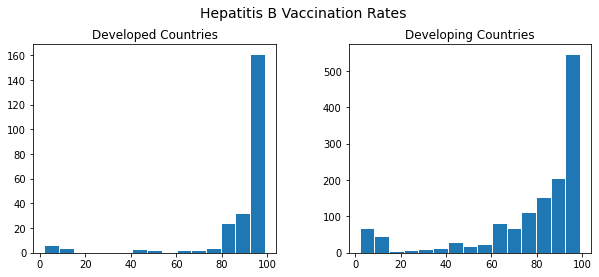

In [54]:
distributions(varname, longname, df)

In [55]:
# Split Developing and Developed Countries 
dfh1 = df3.loc[df3['Status_Developing']==1]
dfh0 = df3.loc[df3['Status_Developing']==0]
dfh1 = dfh1.drop(columns=['Status_Developing', 'Status_Developed'],axis=1)
dfh0 = dfh0.drop(columns=['Status_Developing', 'Status_Developed'],axis=1)
print(dfh1.shape)
print(dfh0.shape)

(1392, 19)
(242, 19)


In [56]:
print('Correlations with Hepatitis B Vaccination Rate in Developing Countries:\n')
dfh1[dfh1.columns[0:]].corr()['Hepatitis B'][:].to_frame().sort_values(by=['Hepatitis B'], ascending=False).round(2)

Correlations with Hepatitis B Vaccination Rate in Developing Countries:



,Hepatitis B
Hepatitis B,1.00
Diphtheria,0.49
Polio,0.47
Schooling,0.20
Life expectancy,0.18
Income composition of resources,0.15
BMI,0.11
Total expenditure,0.10
Alcohol,0.04
GDP,-0.03


In [57]:
print('Correlations with Hepatitis B Vaccination Rate in Developed Countries:\n')
dfh0[dfh0.columns[0:]].corr()['Hepatitis B'][:].to_frame().sort_values(by=['Hepatitis B'], ascending=False).round(2)

Correlations with Hepatitis B Vaccination Rate in Developed Countries:



,Hepatitis B
Hepatitis B,1.00
thinness 5-9 years,0.18
thinness 1-19 years,0.17
Adult Mortality,0.17
Polio,0.13
Diphtheria,0.12
BMI,0.09
under-five deaths,0.06
Measles,0.05
infant deaths,0.03


PCA for Developing Countires Hepatitis B Vaccination Rates 

[0.33480091 0.49936891 0.60156337 0.68690085 0.75824947 0.80929779
 0.85338513 0.89139396 0.92284217 0.94604677 0.96313035 0.97708886
 0.98692412 0.99152655 0.99573083 0.9980476  0.99988523 1.        ]


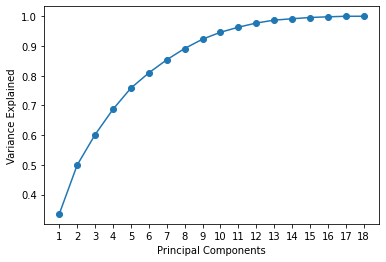

In [58]:
# Find ideal number of Principle Components 
n = dfh1.shape[1]
print('PCA for Developing Countires', longname, '\n')
findPCA(dfh1, varname, RandomForestRegressor(), n)

In [59]:
%%time 

# Check model performance for each combination of model + data transformation 
pca = 12
k=500
mdlacc = runModels(modellist, transformations, pca, k, varname, dfh1)

print('Model Performance for Developing Countries for', longname)
mdlacc.head(n=10)

Model Performance for Developing Countries for Hepatitis B Vaccination Rates
Wall time: 2min 4s


,Model,Transformation,R2 Train,R2 Test,R2 Diff,RMSE Train,RMSE Test
5,RandomForestRegressor(),none,0.92,0.37,0.54,53.35,500.19
7,GradientBoostingRegressor(),none,0.74,0.35,0.39,168.48,517.30
17,RandomForestRegressor(),PCA,0.90,0.28,0.62,65.45,572.36
19,GradientBoostingRegressor(),PCA,0.67,0.27,0.39,214.90,579.54
3,Ridge(),none,0.31,0.25,0.06,445.41,597.35
10,Ridge(),SS,0.31,0.25,0.06,445.41,597.35
8,LinearRegression(),SS,0.31,0.25,0.06,445.40,597.46
1,LinearRegression(),none,0.31,0.25,0.06,445.40,597.46
9,Lasso(),SS,0.29,0.24,0.05,458.89,604.25
2,Lasso(),none,0.29,0.24,0.05,458.89,604.25


In [60]:
# Keep track of best models in a dataframe

bestmodels_Hep = pd.DataFrame(columns = ['Variable', 'Country Status', 'Best Default Model', 'Best Data Transform', 
                                     'R2 Train','R2 Test','R2 Diff','RMSE Train','RMSE Test'])

bestmodels_Hep = bestmodels_Hep.append({'Variable' : varname, 'Country Status' : 'Developing', 
                                            'Best Default Model' : 'RandomForest','Best Data Transform' : 'none',
                                            'R2 Train': 0.92, 'R2 Test' : 0.37, 'R2 Diff' : 0.54,
                                            'RMSE Train' : 53.79, 'RMSE Test': 498.77}, ignore_index = True)

PCA for Developed Countires Hepatitis B Vaccination Rates 

[0.29671254 0.45476673 0.57816455 0.66124484 0.72440627 0.78441172
 0.83750633 0.88831347 0.92828849 0.9585552  0.9778244  0.98801968
 0.99158652 0.99489274 0.99763559 0.99981003 1.         1.        ]


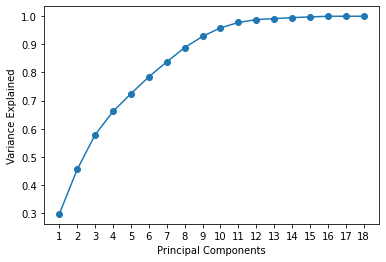

In [61]:
# Find ideal number of Principle Components 
n = dfh0.shape[1]
print('PCA for Developed Countires', longname, '\n')
findPCA(dfh0, varname, RandomForestRegressor(), n)

In [62]:
%%time 

# Check model performance for each combination of model + data transformation 
pca = 12
k = 100
mdlacc = runModels(modellist, transformations, pca, k, varname, dfh0)

print('Model Performance for Developed Countries', longname)
mdlacc.head(n=10)

Model Performance for Developed Countries Hepatitis B Vaccination Rates
Wall time: 5.25 s


,Model,Transformation,R2 Train,R2 Test,R2 Diff,RMSE Train,RMSE Test
7,GradientBoostingRegressor(),none,0.98,0.11,0.87,7.90,155.95
0,DecisionTreeRegressor(),none,1.00,0.04,0.96,0.00,167.51
5,RandomForestRegressor(),none,0.90,0.04,0.86,45.34,167.83
27,GradientBoostingRegressor(),KPCA,0.98,-0.00,0.98,7.20,175.04
20,DecisionTreeRegressor(),KPCA,1.00,-0.00,1.00,0.25,175.18
26,AdaBoostRegressor(),KPCA,0.91,-0.00,0.91,42.28,175.50
25,RandomForestRegressor(),KPCA,0.84,-0.00,0.85,70.55,175.55
16,SVR(),PCA,-0.07,-0.02,-0.05,476.74,178.06
11,SVR(),SS,-0.07,-0.02,-0.05,477.03,178.16
4,SVR(),none,-0.07,-0.02,-0.05,477.03,178.16


In [63]:
bestmodels_Hep = bestmodels_Hep.append({'Variable' : varname, 'Country Status' : 'Developed', 
                                            'Best Default Model' : 'GradientBoost','Best Data Transform' : 'none', 
                                            'R2 Train': 0.98, 'R2 Test' : 0.12, 'R2 Diff' : 0.86,
                                            'RMSE Train' : 7.90, 'RMSE Test': 153.48}, ignore_index = True)

In [64]:
bestmodels_Hep

,Variable,Country Status,Best Default Model,Best Data Transform,R2 Train,R2 Test,R2 Diff,RMSE Train,RMSE Test
0,Hepatitis B,Developing,RandomForest,none,0.92,0.37,0.54,53.79,498.77
1,Hepatitis B,Developed,GradientBoost,none,0.98,0.12,0.86,7.90,153.48


Best model performance for: Hepatitis B Vaccination Rates in Developing Countries

Best Model:  RandomForestRegressor(max_depth=5, min_samples_split=25)

R2 on Training: 0.5086734841808497
R2 on Test:     0.3505424342661124 

Difference:  0.15813104991473725 

RMSE on Training: 317.8281584658759
RMSE on Test:     517.7909361454919

Feature Importance:
Wall time: 1min 30s


,Feature,Importance
17,Diphtheria,0.57
16,Polio,0.07
3,percentage expenditure,0.04
13,Income composition of resources,0.04
11,thinness 1-19 years,0.03
15,Adult Mortality,0.03
6,under-five deaths,0.03
12,thinness 5-9 years,0.03
1,infant deaths,0.03
14,Schooling,0.02


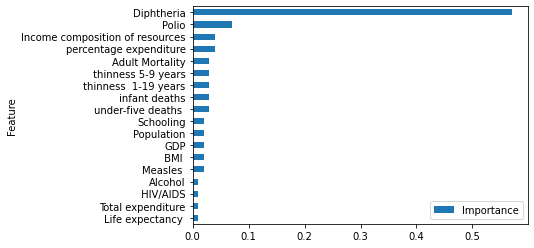

In [65]:
%%time 

# Tune the model 
print('Best model performance for:', longname, 'in Developing Countries')
features = tunedModel(varname, dfh1, RandomForestRegressor, 'none', 0, 0)
features.head(n=10)

Best model performance for: Hepatitis B Vaccination Rates  in Developed Countries

Best Model:  GradientBoostingRegressor(n_estimators=10)

R2 on Training: 0.4870531863847998
R2 on Test:     -0.009762471921664684 

Difference:  0.49681565830646446 

RMSE on Training: 229.11037716916707
RMSE on Test:     176.74072544685535

Feature Importance:
Wall time: 6.73 s


,Feature,Importance
5,BMI,0.29
10,Population,0.19
15,Adult Mortality,0.14
14,Schooling,0.13
11,thinness 1-19 years,0.07
7,Total expenditure,0.06
17,Diphtheria,0.04
9,GDP,0.02
4,Measles,0.02
2,Alcohol,0.01


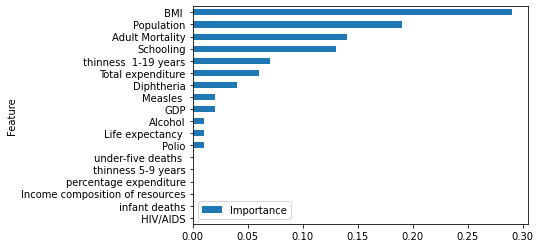

In [66]:
%%time 

#Tune the model 
print('Best model performance for:', longname, ' in Developed Countries')
features = tunedModel(varname, dfh0, GradientBoostingRegressor, 'none', 0, 0)
features.head(n=10)

Best model performance for: Hepatitis B Vaccination Rates  in Developed Countries

Best Model:  GradientBoostingRegressor()

R2 on Training: 0.9823019147407489
R2 on Test:     0.12291118573128268 

Difference:  0.8593907290094662 

RMSE on Training: 7.904942347416372
RMSE on Test:     153.51859236773177

Feature Importance:
Wall time: 351 ms


,Feature,Importance
5,BMI,0.210230
14,Schooling,0.174508
15,Adult Mortality,0.151706
10,Population,0.143536
0,Life expectancy,0.076865
7,Total expenditure,0.064822
11,thinness 1-19 years,0.058596
17,Diphtheria,0.035178
13,Income composition of resources,0.021726
2,Alcohol,0.017032


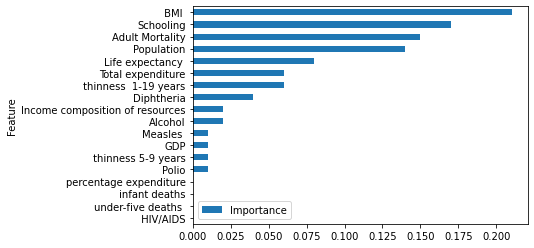

In [67]:
%%time 

#Default settings were better 
print('Best model performance for:', longname, ' in Developed Countries')
features = defaultSettings(varname, dfh0, GradientBoostingRegressor, 'none', 0, 0)
features.head(n=10)